In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53409/3573333655.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False

In [9]:
# e1_grade = pd.read_csv('csv/재무비율/최종/등급/환경_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
# s1_grade = pd.read_csv('csv/재무비율/최종/등급/사회_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
# g1_grade = pd.read_csv('csv/재무비율/최종/등급/지배구조_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
# t1_grade = pd.read_csv('csv/재무비율/최종/등급/통합등급_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
esg2_grade = pd.read_csv('csv/재무비율/최종/등급/esg2기_등급(t+1).csv', index_col=0).reset_index(drop=True)

e1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/환경_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
s1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/사회_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
g1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/지배구조_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
t1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/통합등급_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
esg2_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/esg2기_등급차이포함.csv', index_col=0).reset_index(drop=True)

In [5]:
# feature_e1 = e1_grade.loc[:, ~e1_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급', 't+1년도_환경등급'])]
# feature_s1 = s1_grade.loc[:, ~s1_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','사회_등급', 't+1년도_사회등급'])]
# feature_g1 = g1_grade.loc[:, ~g1_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','지배구조_등급', 't+1년도_지배구조등급'])]
# feature_t1 = t1_grade.loc[:, ~t1_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '통합_등급', 't+1년도_통합등급'])]
# feature_esg2 = esg2_grade.loc[:, ~esg2_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급', '사회_등급', '지배구조_등급', '통합_등급', 't+1년도_환경등급', 't+1년도_사회등급','t+1년도_지배구조등급', 't+1년도_통합등급'])]

feature_e1_sub = e1_grade_sub.loc[:, ~e1_grade_sub.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'])]
feature_s1_sub = s1_grade_sub.loc[:, ~s1_grade_sub.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'])]
feature_g1_sub = g1_grade_sub.loc[:, ~g1_grade_sub.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'])]
feature_t1_sub = t1_grade_sub.loc[:, ~t1_grade_sub.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'])]
feature_esg2_sub = esg2_grade_sub.loc[:, ~esg2_grade_sub.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'])]
# feature_e1

In [6]:
feature_esg2_sub.columns

Index(['총자산(천원)', '유동자산(천원)', '매출채권(천원)', '재고자산(천원)', '유형자산(천원)',
       '부채및자본총계(천원)', '총부채(천원)', '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)',
       '장기차입금(천원)', '총자본(천원)', '매출액(천원)', '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)',
       '광고선전비(천원)', '당기순이익(천원)', '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)',
       '재무활동으로인한현금흐름(천원)', '자기자본비율(%)', '차입금의존도(%)', '부채비율(%)', '차입금비율(%)',
       '*매출원가율(%)', 'ROE(당기순이익)(%)', '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)',
       '총자산(천원)_증가율(%)', '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)',
       '부채및자본총계(천원)_증가율(%)', '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)',
       '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)', '영업이익(천원)_증가율(%)',
       '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율'],
      dtype='object')

In [7]:

# feature_t1 = t1_grade.loc[:, ~t1_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','총자산(천원)','총자본(천원)','총부채(천원)', '통합_등급', 't+1년도_통합등급'])]
# feature_esg2 = esg2_grade.loc[:, ~esg2_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','총자산(천원)','총자본(천원)','총부채(천원)', '환경_등급', '사회_등급', '지배구조_등급', '통합_등급', 't+1년도_환경등급', 't+1년도_사회등급',
#        't+1년도_지배구조등급', 't+1년도_통합등급'])]

feature_esg2_sub = esg2_grade_sub.loc[:, ~esg2_grade_sub.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','총자산(천원)','총자본(천원)','총부채(천원)', '환경_등급', '사회_등급', '지배구조_등급', '통합_등급', 't+1년도_환경등급', 't+1년도_사회등급',
       't+1년도_지배구조등급', 't+1년도_통합등급', '환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'])]

## 통합
- RandomForestClassifier(n_estimators=155, max_depth=7, min_samples_split=4, random_state=42)

## 환경
- RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=4, random_state=42)

## 사회
- RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=7, random_state=42)

## 지배구조
- RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=4, random_state=42)

In [267]:
def transform_values(x):
    if x > 0:
        return 2
    elif x == 0:
        return 1
    else:
        return 0

In [269]:
esg2_grade_sub['환경_등급차이'] = esg2_grade_sub['환경_등급차이'].apply(transform_values)

## t 년도 재무 -> t+1 년도 esg 등급 예측

### 환경

In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# y_columns = ['통합등급변화', '환경등급변화', '사회등급변화', '지배등급변화']

# for col in y_columns :


X = esg2_grade_sub[e_feature['feature']].iloc[:, :15].values
y = esg2_grade_sub['환경_등급차이'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=4, random_state=21)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)


# plt.figure(figsize=(8, 6))
# plt.barh(range(len(feature_importance)), feature_importance, tick_label=feature_esg2.columns)
# plt.title('통합 Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

Accuracy: 0.5197368421052632
Recall:  0.5197368421052632
Precision:  0.6222769774293418
f1 score:  0.41891893065970354


### 사회

In [272]:
X = esg2_grade_sub[s_feature['feature']].iloc[:, :6].values
y = esg2_grade_sub['사회_등급차이'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=7, random_state=67)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)

Accuracy: 0.4901315789473684
Recall:  0.4901315789473684
Precision:  0.3911047149122807
f1 score:  0.3567977768446406


### 지배구조

In [273]:
X = esg2_grade_sub[g_feature['feature']].iloc[:, :15].values
y = esg2_grade_sub['지배구조_등급차이'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=4, random_state=40)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)

Accuracy: 0.40789473684210525
Recall:  0.40789473684210525
Precision:  0.1663781163434903
f1 score:  0.2363502213477619


### 통합

In [274]:
X = esg2_grade_sub[t_feature['feature']].iloc[:, :23].values
y = esg2_grade_sub['통합_등급차이'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=155, max_depth=7, min_samples_split=4, random_state=40)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)

Accuracy: 0.5
Recall:  0.5
Precision:  0.40899659550975337
f1 score:  0.36557451670976626


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

X = feature_esg2.values
y = esg2_grade.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# 특성 중요도 가져오기
feature_importance = rf_model.feature_importances_

# 중요도를 기준으로 내림차순으로 정렬하여 상위 15개의 특성 선택
top_features_indices = feature_importance.argsort()[-15:][::-1]
top_features = feature_esg2.columns[top_features_indices]

# 선택된 특성으로 데이터프레임 구성
X_selected = feature_esg2[top_features]

# 새로운 데이터프레임으로 데이터 분할
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# 모델 다시 훈련
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# 모델 예측
y_pred_selected = rf_model_selected.predict(X_test_selected)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average=None)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected, average=None)

print("Accuracy: ", accuracy)
print("Accuracy with top 15 features: ", accuracy_selected)

print("Recall: ", recall)
print("Recall with top 15 features: ", recall_selected)


Accuracy:  0.4473684210526316
Accuracy with top 15 features:  0.47368421052631576
Recall:  [0.57731959 0.46808511 0.08450704 0.52       0.55223881 0.        ]
Recall with top 15 features:  [0.60824742 0.45390071 0.11267606 0.58666667 0.6119403  0.        ]


## GridSearch

In [255]:
esg2_grade = pd.read_csv('csv/재무비율/최종/등급차이/esg2기_등급차이포함.csv', index_col=0)
feature_esg2 = esg2_grade.loc[:, ~esg2_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '환경_등급', '사회_등급', '지배구조_등급', '통합_등급', '환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'])]

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_columns = ['환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이']

for col in y_columns :

    X = feature_esg2.values
    y = esg2_grade[col].values

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # 랜덤 포레스트 모델 생성
    model = RandomForestClassifier()

    # 탐색할 하이퍼파라미터 그리드 정의
    param_grid = {
        'n_estimators': [30, 50, 100, 150, 200],  # 결정 트리의 개수
        'max_depth': [3, 5, 10, 20, 50],  # 트리의 최대 깊이
        'min_samples_leaf' : [5,10,15,20],
        'min_samples_split': [2, 5, 7, 10, 15]  # 내부 노드를 분할하기 위한 최소 샘플 수
    }

    # 그리드 서치 객체 생성
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

    # 그리드 서치 수행
    grid_search.fit(X_train, y_train)

    # 최적의 하이퍼파라미터와 성능 출력
    print(f"{col}_Best Parameters:", grid_search.best_params_)
    print(f"{col}_Best Accuracy:", grid_search.best_score_)

    # 테스트 데이터에 대한 예측과 정확도 계산
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # print(f"{col}_Test Accuracy: ", accuracy)
    print(f'{col}_Test Recall: ', recall)
    print(f'{col}_Test Precision: ', precision)
    print(f'{col}_Test F1score: ', f1)

환경_등급차이_Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 150}
환경_등급차이_Best Accuracy: 0.5016392885079753
환경_등급차이_Test Recall:  0.4506578947368421
환경_등급차이_Test Precision:  0.35947952164584124
환경_등급차이_Test F1score:  0.31240596176115704
사회_등급차이_Best Parameters: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 150}
사회_등급차이_Best Accuracy: 0.46458524640342824
사회_등급차이_Test Recall:  0.5098684210526315
사회_등급차이_Test Precision:  0.2599658067867036
사회_등급차이_Test F1score:  0.3443555784887054
지배구조_등급차이_Best Parameters: {'max_depth': 50, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 30}
지배구조_등급차이_Best Accuracy: 0.4440057137026834
지배구조_등급차이_Test Recall:  0.39473684210526316
지배구조_등급차이_Test Precision:  0.3010508217675071
지배구조_등급차이_Test F1score:  0.2573415606363268
통합_등급차이_Best Parameters: {'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 30}
통합_등급차이_Best Accuracy: 0.4777505

In [173]:
e_feature = pd.read_csv('csv/feature/feature_환경.csv', index_col=0)
s_feature = pd.read_csv('csv/feature/feature_사회.csv', index_col=0)
g_feature = pd.read_csv('csv/feature/feature_지배구조.csv', index_col=0)
t_feature = pd.read_csv('csv/feature/feature_통합.csv', index_col=0)

In [158]:
feature_esg2

,유동자산(천원),매출채권(천원),재고자산(천원),유형자산(천원),부채및자본총계(천원),유동부채(천원),매입채무(천원),단기차입금(천원),장기차입금(천원),매출액(천원),...,유동부채(천원)_증가율(%),총자본(천원)_증가율(%),매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율
0,1.185255e+09,243210194,236961655,1.476614e+09,4.152092e+09,1611669523,275930960,697378057,974138170,2.619977e+09,...,2.950403,-11.698180,-30.311267,-268.691990,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745
1,1.352749e+09,287334993,375434184,1.634149e+09,4.548737e+09,1873942575,353029488,794593961,284988948,3.167700e+09,...,16.273377,-4.775846,20.905618,-25.203638,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606
2,1.578818e+09,332397459,357702292,1.819268e+09,4.985366e+09,2366670547,316428299,826452036,172101418,3.787960e+09,...,26.293654,5.074167,19.580777,-86.831318,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722
3,1.163563e+08,4338337,34704886,6.143262e+07,6.791349e+08,121169201,3752236,38809978,45500000,1.618634e+08,...,10.778585,4.222752,-5.115012,-1.935364,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733
4,1.333390e+08,4923098,30955006,6.903699e+07,6.844345e+08,130677557,3855973,28227391,0,1.644459e+08,...,7.847172,6.438325,1.595492,16.435303,63.277494,0.843629,-85.617341,0.240265,0.341307,0.811589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,4.119306e+08,94258672,236068035,4.607221e+08,9.519209e+08,175550684,54500020,100478596,25000000,6.165055e+08,...,40.617685,51.134870,68.622373,258.007480,339.603512,-86.463751,-103.207569,0.647644,0.984204,1.893904
1514,6.405798e+08,153866354,197585910,4.889362e+08,1.206374e+09,195447063,54402901,84239449,25000000,1.030923e+09,...,11.333695,45.143770,67.220476,357.524683,497.976681,7104.662386,-4166.675067,0.854564,1.133904,3.468866
1515,5.909465e+07,1596076,7553389,1.797536e+08,2.867760e+08,152820982,11344824,12525452,0,8.893884e+07,...,-24.475943,-185.007728,-12.947450,-53.110598,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095
1516,5.526361e+07,3993001,6823665,1.421733e+08,2.472987e+08,26670341,8879328,0,0,8.172431e+07,...,-82.547985,-491.646312,-8.111781,-67.664078,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119


In [177]:
list = [e_feature, s_feature, g_feature,t_feature]
aa = [1,2,3]

for i in list :
    print(esg2_grade[i['feature']].iloc[:, :19].values)
    for j in aa :
        print(j)

[[-2.68691990e+02 -1.69921082e+02 -3.03112673e+01 ...  2.61997722e+09
  -1.91716473e+08  2.07496312e+00]
 [-2.52036375e+01 -9.49058952e+01  2.09056182e+01 ...  3.16769965e+09
  -9.76623800e+06  2.63456999e+00]
 [-8.68313180e+01 -3.85246936e+03  1.95807769e+01 ...  3.78795986e+09
   3.66475089e+08  2.99830049e+00]
 ...
 [-5.31105984e+01 -6.71469008e+01 -1.29474497e+01 ...  8.89388380e+07
  -3.95823700e+06 -3.38378081e+00]
 [-6.76640777e+01 -3.34127290e+01 -8.11178127e+00 ...  8.17243140e+07
  -2.63568200e+06  7.93904044e-01]
 [-1.68315977e+03 -1.34208209e+03  1.17634226e+02 ...  1.77860078e+08
   3.27373340e+07  1.31451480e+00]]
1
2
3
[[ 2.61997722e+09 -2.68691990e+02  6.54320740e+07 ... -1.91716473e+08
  -5.60649553e+02 -3.03112673e+01]
 [ 3.16769965e+09 -2.52036375e+01  7.05728230e+07 ... -9.76623800e+06
  -2.45864683e+01  2.09056182e+01]
 [ 3.78795986e+09 -8.68313180e+01  7.64607690e+07 ...  3.66475089e+08
  -3.73596900e+01  1.95807769e+01]
 ...
 [ 8.89388380e+07 -5.31105984e+01  2.2

In [217]:
# feature_list = [e_feature, s_feature, g_feature,t_feature]
# list = ['환경','사회','지배구조','통합']



X = esg2_grade[g_feature['feature']].iloc[:, :20].values

y = esg2_grade['지배구조_등급차이'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 랜덤 포레스트 모델 생성
model = RandomForestClassifier()

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [200],  # 결정 트리의 개수
    'max_depth': [4,5,6],  # 트리의 최대 깊이
    'min_samples_split': [1,2,3,4,5,6]  # 내부 노드를 분할하기 위한 최소 샘플 수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 출력
print("지배구조_Best Parameters: ", grid_search.best_params_)
print('지배구조_Best Accuracy: ', grid_search.best_score_)

# 테스트 데이터에 대한 예측과 정확도 계산
best_model = grid_search.best_estimator_
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
print('지배구조_Test Accuracy: ', accuracy)
print('지배구조_Test Recall: ', recall)

지배구조_Best Parameters:  {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200}
지배구조_Best Accuracy:  0.4303082646824342
지배구조_Test Accuracy:  0.43640350877192985
지배구조_Test Recall:  0.43640350877192985


In [1]:
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

X = feature_esg2.values
y = esg2_grade.iloc[:,-1].values

models = {
    'Logistic Regression': LogisticRegression(),
    # 'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Neural Network': MLPClassifier()
    'AdaBoost': AdaBoostClassifier()
}

y_columns = ['t+1년도_환경등급', 't+1년도_사회등급', 't+1년도_지배구조등급', 't+1년도_통합등급']

for name, model in models.items():
    print(f"Model: {name}")
    for col in y_columns:
        X = feature_esg2.values
        y = esg2_grade[col].values

        # 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # 모델 훈련
        model.fit(X_train, y_train)

        # 모델 예측
        y_pred = model.predict(X_test)

        # 정확도 평가
        accuracy = accuracy_score(y_test, y_pred)
        
        # Precision 평가
        # precision = precision_score(y_test, y_pred, average='None')
        
        # Recall 평가
        recall = recall_score(y_test, y_pred, average='micro')
        
        # F1 Score 평가
        f1 = f1_score(y_test, y_pred, average='micro')

        print(f"{col} Accuracy:", accuracy)
    print()


NameError: name 'feature_esg2' is not defined

In [18]:
from scipy.stats.mstats import winsorize


for col in total_1.columns:
    total_1[col] = winsorize(total_1[col], limits=[0.05, 0.05])

print("Winsorized DataFrame:")
print(total_1)

Winsorized DataFrame:
            종목명   업종명     종목코드  결산월  회계연도      주기       총자산(천원)      유동자산(천원)  \
0     HD현대인프라코어  기타금융  A006840   12  2012  Annual  1.062013e+09  4.551731e+08   
1     HD현대인프라코어  기타금융  A006840   12  2013  Annual  2.374994e+09  7.025583e+08   
2     HD현대인프라코어  기타금융  A006840   12  2014  Annual  2.773154e+09  8.606906e+08   
3     HD현대인프라코어  기타금융  A006840   12  2015  Annual  2.495515e+09  9.691790e+08   
4     HD현대인프라코어  기타금융  A006840   12  2016  Annual  2.741947e+09  1.179858e+09   
...         ...   ...      ...  ...   ...     ...           ...           ...   
1612    현대비앤지스틸  전기전자  A005870   12  2014  Annual  1.346496e+08  5.075072e+07   
1613    현대비앤지스틸  전기전자  A005870   12  2015  Annual  1.641320e+08  7.936387e+07   
1614    현대비앤지스틸  전기전자  A005870   12  2016  Annual  1.583964e+08  8.192512e+07   
1615    현대비앤지스틸  전기전자  A005870   12  2017  Annual  1.462292e+08  6.754891e+07   
1616    현대비앤지스틸  전기전자  A005870   12  2018  Annual  2.272701e+08  1.473392e+08   

     

/opt/homebrew/lib/python3.11/site-packages/scipy/_lib/_util.py:714: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for el in a.ravel():


In [9]:
df.columns

Index(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'],
      dtype='object')

In [10]:
df

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급차이,사회_등급차이,지배구조_등급차이,통합_등급차이
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745,2,1,1,1
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606,1,2,0,1
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722,2,2,2,2
3,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733,1,1,1,1
4,BYC,섬유의복,A001460,12,2021,Annual,6.844345e+08,1.333390e+08,4923098,30955006,...,63.277494,0.843629,-85.617341,0.240265,0.341307,0.811589,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,휴스틸,철강금속,A005010,12,2021,Annual,9.519209e+08,4.119306e+08,94258672,236068035,...,339.603512,-86.463751,-103.207569,0.647644,0.984204,1.893904,0,0,0,0
1514,휴스틸,철강금속,A005010,12,2022,Annual,1.206374e+09,6.405798e+08,153866354,197585910,...,497.976681,7104.662386,-4166.675067,0.854564,1.133904,3.468866,2,2,1,2
1515,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095,1,1,1,1
1516,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119,2,2,2,2


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#파일로드
df = pd.read_csv('esg2기.csv', encoding='utf-8-sig', index_col = 0)
df.reset_index(inplace=True, drop=True)

# 데이터 불러오기 (예시로 가정)
columns_to_transform = ['통합_등급차이', '환경_등급차이', '사회_등급차이', '지배구조_등급차이']

# 값을 조건에 따라 변환하는 함수
def transform_values(x):
    if x < 0:
        return 0
    elif x == 0:
        return 1
    else :
        return 2

# 각 컬럼에 대해 변환 함수 적용
for column in columns_to_transform:
    df[column] = df[column].apply(transform_values)

In [13]:
df = pd.read_csv('csv/재무비율/최종/등급/환경_1기_등급(t+1).csv', index_col=0)
df

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급,t+1년도_환경등급
0,AK홀딩스,기타금융,A006840,12,2011,Annual,7.973953e+08,368464610.0,164957170,100459041,...,-70.002310,-73.225758,-22.671420,114.044689,551.323235,0.489446,1.111925,0.874290,3.0,2.0
1,AK홀딩스,기타금융,A006840,12,2012,Annual,1.062013e+09,455173056.0,243262270,120241742,...,9.681788,31.058911,340.927530,-63.805247,-96.310584,0.403073,0.838010,0.776615,2.0,2.0
2,AK홀딩스,기타금융,A006840,12,2013,Annual,2.374994e+09,702558263.0,300681262,141634818,...,423.508219,302.509703,-44.002663,1049.631550,-422.996213,0.943569,3.528971,1.287935,2.0,2.0
3,AK홀딩스,기타금융,A006840,12,2014,Annual,2.773154e+09,860690585.0,330216202,229358723,...,28.242304,35.402624,-12.942332,20.406794,-1115.904708,1.036320,3.475007,1.476704,2.0,2.0
4,AK홀딩스,기타금융,A006840,12,2015,Annual,2.495515e+09,969178974.0,224543905,203315762,...,-2.321824,-27.929648,-139.708844,-35.720894,-174.076296,1.124877,3.113541,1.761158,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,흥아해운,운수창고업,A003280,12,2013,Annual,5.710601e+08,177757981.0,28756477,14418731,...,5.977506,-43.435139,11.031152,-0.255439,-8.265543,1.348241,4.956174,1.852062,3.0,3.0
3552,흥아해운,운수창고업,A003280,12,2014,Annual,6.492400e+08,153440914.0,34651440,13193030,...,7.171915,-3.906495,1.063296,-98.376335,-180.023730,1.270940,4.929099,1.712497,3.0,3.0
3553,흥아해운,운수창고업,A003280,12,2015,Annual,7.916408e+08,136280257.0,32088632,11488626,...,2.420227,14.408829,-42.676587,7667.595814,-102.318119,1.067549,4.882897,1.366253,3.0,2.0
3554,흥아해운,운수창고업,A003280,12,2016,Annual,9.585323e+08,102103828.0,33831395,17967554,...,-1.581947,-72.247242,-263.287062,-104.097563,2351.907560,0.867729,4.321045,1.085767,2.0,3.0


In [7]:
# 카테고리 별로 데이터 프레임 만들기
categories = ['통합', '환경', '사회', '지배구조']

# 결과를 저장할 딕셔너리
final_scores = {}
feature_importances = {}

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    # 'LogisticRegression': LogisticRegression(C=1, penalty='l2'),  # LogisticRegression does not have random_state
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    # 'DecisionTree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, random_state=42)
}

for 대상 in categories:
    X = df.drop(columns=[ '종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이'], axis=1)
    y = df[f'{대상}_등급차이']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scores_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    importances_df = pd.DataFrame(index=X.columns)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # 기본 평가 지표 계산
        scores_df.loc[model_name] = [
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred, average='weighted', zero_division=0),
            recall_score(y_test, y_pred, average='weighted', zero_division=0),
            f1_score(y_test, y_pred, average='weighted', zero_division=0)
        ]
        
        # Feature importance 추출 (Logistic Regression 제외)
        # if hasattr(model, 'feature_importances_'):
        #     importances_df[model_name] = model.feature_importances_
    
    # 카테고리별 최종 점수 저장
    final_scores[대상] = scores_df
    feature_importances[대상] = importances_df

# 최종 결과 출력
for category, scores in final_scores.items():
    print(f"Results for {category} - Scores:")
    print(scores)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Results for 통합 - Scores:
                    Accuracy  Precision    Recall  F1 Score
RandomForest        0.440789   0.382379  0.440789  0.381846
GradientBoosting    0.440789   0.394942  0.440789  0.390604
LogisticRegression  0.411184   0.350404  0.411184  0.351081
XGBoost             0.460526   0.441550  0.460526  0.432025
DecisionTree        0.401316   0.397749  0.401316  0.399136
Results for 환경 - Scores:
                    Accuracy  Precision    Recall  F1 Score
RandomForest        0.493421   0.452205  0.493421  0.462275
GradientBoosting    0.473684   0.449257  0.473684  0.456750
LogisticRegression  0.411184   0.412501  0.411184  0.382174
XGBoost             0.506579   0.489766  0.506579  0.492323
DecisionTree        0.457237   0.451806  0.457237  0.454018
Results for 사회 - Scores:
                    Accuracy  Precision    Recall  F1 Score
RandomForest        0.460526   0.438383  0.460526  0.428313
GradientBoosting    0.473684   0.448251  0.473684  0.440225
LogisticRegression  0.394

In [14]:
df.columns

Index(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급', 't+1년도_환경등급'],
      dtype='object')

In [23]:
feature_df = df.loc[:, ~df.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '환경_등급', 't+1년도_환경등급'])]
feature_df


,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),유형자산(천원),부채및자본총계(천원),총부채(천원),유동부채(천원),매입채무(천원),단기차입금(천원),...,유동부채(천원)_증가율(%),총자본(천원)_증가율(%),매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율
0,7.973953e+08,368464610.0,164957170,100459041,1.618174e+08,7.973953e+08,4.463985e+08,371846821,88261980,250570529,...,8.714815,31.095649,-70.002310,-73.225758,-22.671420,114.044689,551.323235,0.489446,1.111925,0.874290
1,1.062013e+09,455173056.0,243262270,120241742,2.277562e+08,1.062013e+09,5.511975e+08,446381736,132002396,278568031,...,20.044521,45.532722,9.681788,31.058911,340.927530,-63.805247,-96.310584,0.403073,0.838010,0.776615
2,2.374994e+09,702558263.0,300681262,141634818,1.169178e+09,2.374994e+09,1.739973e+09,1351772260,272943954,349773376,...,202.828756,24.315318,423.508219,302.509703,-44.002663,1049.631550,-422.996213,0.943569,3.528971,1.287935
3,2.773154e+09,860690585.0,330216202,229358723,1.349567e+09,2.773154e+09,1.946141e+09,1273322616,384587781,461811659,...,-5.803466,30.233802,28.242304,35.402624,-12.942332,20.406794,-1115.904708,1.036320,3.475007,1.476704
4,2.495515e+09,969178974.0,224543905,203315762,9.409336e+08,2.495515e+09,1.593922e+09,1232855273,321221478,599867254,...,-3.178090,9.018106,-2.321824,-27.929648,-139.708844,-35.720894,-174.076296,1.124877,3.113541,1.761158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,5.710601e+08,177757981.0,28756477,14418731,2.228765e+08,5.710601e+08,4.157132e+08,247832104,44486501,109790262,...,13.250330,24.611435,5.977506,-43.435139,11.031152,-0.255439,-8.265543,1.348241,4.956174,1.852062
3552,6.492400e+08,153440914.0,34651440,13193030,3.235976e+08,6.492400e+08,4.818372e+08,235170802,52216351,97803686,...,-5.108822,7.760601,7.171915,-3.906495,1.063296,-98.376335,-180.023730,1.270940,4.929099,1.712497
3553,7.916408e+08,136280257.0,32088632,11488626,4.833198e+08,7.916408e+08,6.185642e+08,262487550,53092211,107562548,...,11.615706,3.389326,2.420227,14.408829,-42.676587,7667.595814,-102.318119,1.067549,4.882897,1.366253
3554,9.585323e+08,102103828.0,33831395,17967554,6.710422e+08,9.585323e+08,7.660450e+08,258729193,49227200,115674885,...,-1.431823,11.215038,-1.581947,-72.247242,-263.287062,-104.097563,2351.907560,0.867729,4.321045,1.085767


0       2
1       2
2       2
3       2
4       3
       ..
3551    3
3552    3
3553    2
3554    3
3555    2
Name: t+1년도_환경등급, Length: 3556, dtype: int64

In [ ]:
df = pd.read_csv('csv/재무비율/최종/등급/환경_1기_등급(t+1).csv', index_col=0)
df

In [38]:
df = pd.read_csv('csv/재무비율/최종/등급/환경_1기_등급(t+1).csv', index_col=0)
df['t+1년도_환경등급'] = df['t+1년도_환경등급'] - 1

X = df[['영업이익(천원)_증가율(%)',
'영업활동으로인한현금흐름(천원)_증가율(%)',
'매출액(천원)_증가율(%)',
'유형자산(천원)',
'투자활동으로인한현금흐름(천원)',
'광고선전비(천원)',
'당기순이익(천원)_증가율(%)',
'재무활동으로인한현금흐름(천원)'
]].values

y = df['t+1년도_환경등급'].astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scores_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
# importances_df = pd.DataFrame(index=X.columns)

final_scores = {}
feature_importances = {}

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=0),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0),
    # 'LogisticRegression': LogisticRegression(C=1, penalty='l2'),  # LogisticRegression does not have random_state
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=0),
    # 'DecisionTree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 기본 평가 지표 계산
    scores_df.loc[model_name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted', zero_division=0),
        recall_score(y_test, y_pred, average='weighted', zero_division=0),
        f1_score(y_test, y_pred, average='weighted', zero_division=0)
    ]
    
    # Feature importance 추출 (Logistic Regression 제외)
    # if hasattr(model, 'feature_importances_'):
    #     importances_df[model_name] = model.feature_importances_

# 카테고리별 최종 점수 저장
# final_scores[대상] = scores_df
# # feature_importances[대상] = importances_df

# for scores in final_scores.items():
#     print(scores)

scores_df

,Accuracy,Precision,Recall,F1 Score
RandomForest,0.522472,0.496883,0.522472,0.496647
GradientBoosting,0.495787,0.474888,0.495787,0.466076
XGBoost,0.508427,0.480361,0.508427,0.480488


In [46]:
df = pd.read_csv('csv/재무비율/최종/등급차이/esg2기_등급차이포함.csv', index_col=0)
df

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급차이,사회_등급차이,지배구조_등급차이,통합_등급차이
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745,1.0,0.0,0.0,0.0
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606,0.0,1.0,-1.0,0.0
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722,2.0,1.0,1.0,1.0
3,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733,0.0,0.0,0.0,0.0
4,BYC,섬유의복,A001460,12,2021,Annual,6.844345e+08,1.333390e+08,4923098,30955006,...,63.277494,0.843629,-85.617341,0.240265,0.341307,0.811589,0.0,-2.0,-3.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,휴스틸,철강금속,A005010,12,2021,Annual,9.519209e+08,4.119306e+08,94258672,236068035,...,339.603512,-86.463751,-103.207569,0.647644,0.984204,1.893904,-1.0,-1.0,-1.0,-1.0
1514,휴스틸,철강금속,A005010,12,2022,Annual,1.206374e+09,6.405798e+08,153866354,197585910,...,497.976681,7104.662386,-4166.675067,0.854564,1.133904,3.468866,1.0,1.0,0.0,1.0
1515,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095,0.0,0.0,0.0,0.0
1516,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119,1.0,1.0,1.0,1.0


In [82]:
df = pd.read_csv('csv/재무비율/최종/등급차이/esg2기_등급차이포함.csv', index_col=0)
# df['환경_등급차이'] = df['환경_등급차이'] + 1
# df['t+1년도_사회등급'] = df['t+1년도_사회등급'] - 1
# df['t+1년도_지배구조등급'] = df['t+1년도_지배구조등급'] - 1
# df['t+1년도_통합등급'] = df['t+1년도_통합등급'] - 1

columns_to_transform = ['통합_등급차이', '환경_등급차이', '사회_등급차이', '지배구조_등급차이']

# 값을 조건에 따라 변환하는 함수
def transform_values(x):
    if x < 0:
        return 0
    elif x == 0:
        return 1
    else :
        return 2

# 각 컬럼에 대해 변환 함수 적용
for column in columns_to_transform:
    df[column] = df[column].apply(transform_values)

X = df[['영업이익(천원)_증가율(%)',
'영업활동으로인한현금흐름(천원)_증가율(%)',
'매출액(천원)_증가율(%)',
'유형자산(천원)',
'투자활동으로인한현금흐름(천원)',
'광고선전비(천원)',
'당기순이익(천원)_증가율(%)',
'재무활동으로인한현금흐름(천원)',
'총자본(천원)_증가율(%)',
'*매출원가율(%)',
'총부채(천원)_증가율(%)',
'투자활동으로인한현금흐름(천원)_증가율(%)',
'유동부채(천원)_증가율(%)',
'영업이익률(%)',
'유동자산(천원)_증가율(%)',
'유형자산(천원)_증가율(%)',
'매출액(천원)',
'영업활동으로인한현금흐름(천원)',
'총자본(천원)_회전율',
'총자산(천원)_회전율',
'매출총이익률(%)'
]].values

y = df['환경_등급차이'].astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

scores_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
# importances_df = pd.DataFrame(index=X.columns)

final_scores = {}
feature_importances = {}

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=15),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=15),
    # 'LogisticRegression': LogisticRegression(C=1, penalty='l2'),  # LogisticRegression does not have random_state
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=15),
    # 'DecisionTree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 기본 평가 지표 계산
    scores_df.loc[model_name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted', zero_division=0),
        recall_score(y_test, y_pred, average='weighted', zero_division=0),
        f1_score(y_test, y_pred, average='weighted', zero_division=0)
    ]
    

scores_df

,Accuracy,Precision,Recall,F1 Score
RandomForest,0.546053,0.513218,0.546053,0.497546
GradientBoosting,0.486842,0.456778,0.486842,0.457709
XGBoost,0.516447,0.484158,0.516447,0.484685


In [83]:
df = pd.read_csv('csv/재무비율/최종/등급차이/사회_1기_등급차이포함.csv', index_col=0)
df

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,총자본(천원)_증가율(%),매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,사회_등급차이
0,AK홀딩스,기타금융,A006840,12,2011,Annual,7.973953e+08,368464610.0,164957170,100459041,...,31.095649,-70.002310,-73.225758,-22.671420,114.044689,551.323235,0.489446,1.111925,0.874290,0.0
1,AK홀딩스,기타금융,A006840,12,2012,Annual,1.062013e+09,455173056.0,243262270,120241742,...,45.532722,9.681788,31.058911,340.927530,-63.805247,-96.310584,0.403073,0.838010,0.776615,0.0
2,AK홀딩스,기타금융,A006840,12,2013,Annual,2.374994e+09,702558263.0,300681262,141634818,...,24.315318,423.508219,302.509703,-44.002663,1049.631550,-422.996213,0.943569,3.528971,1.287935,0.0
3,AK홀딩스,기타금융,A006840,12,2014,Annual,2.773154e+09,860690585.0,330216202,229358723,...,30.233802,28.242304,35.402624,-12.942332,20.406794,-1115.904708,1.036320,3.475007,1.476704,0.0
4,AK홀딩스,기타금융,A006840,12,2015,Annual,2.495515e+09,969178974.0,224543905,203315762,...,9.018106,-2.321824,-27.929648,-139.708844,-35.720894,-174.076296,1.124877,3.113541,1.761158,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,흥아해운,운수창고업,A003280,12,2013,Annual,5.710601e+08,177757981.0,28756477,14418731,...,24.611435,5.977506,-43.435139,11.031152,-0.255439,-8.265543,1.348241,4.956174,1.852062,0.0
2733,흥아해운,운수창고업,A003280,12,2014,Annual,6.492400e+08,153440914.0,34651440,13193030,...,7.760601,7.171915,-3.906495,1.063296,-98.376335,-180.023730,1.270940,4.929099,1.712497,0.0
2734,흥아해운,운수창고업,A003280,12,2015,Annual,7.916408e+08,136280257.0,32088632,11488626,...,3.389326,2.420227,14.408829,-42.676587,7667.595814,-102.318119,1.067549,4.882897,1.366253,0.0
2735,흥아해운,운수창고업,A003280,12,2016,Annual,9.585323e+08,102103828.0,33831395,17967554,...,11.215038,-1.581947,-72.247242,-263.287062,-104.097563,2351.907560,0.867729,4.321045,1.085767,0.0


In [87]:
s = pd.read_csv('csv/feature/feature_사회.csv', index_col=0)
s

,feature,순위평균_x,순위평균_y,최종순위평균
0,매출액(천원),1.0,4.2,2.6
1,영업이익(천원)_증가율(%),15.6,8.6,12.1
2,광고선전비(천원),7.8,16.8,12.3
3,투자활동으로인한현금흐름(천원)_증가율(%),20.0,5.0,12.5
4,매입채무(천원),4.2,22.2,13.2
5,재무활동으로인한현금흐름(천원),10.2,16.4,13.3
6,총부채(천원),9.8,19.2,14.5
7,유형자산(천원)_증가율(%),16.2,13.6,14.9
8,재고자산(천원),14.8,18.0,16.4
9,유형자산(천원),13.2,20.0,16.6


In [132]:
df = pd.read_csv('csv/재무비율/최종/등급차이/환경_1기_등급차이포함.csv', index_col=0)
# df['환경_등급차이'] = df['환경_등급차이'] + 1
# df['t+1년도_사회등급'] = df['t+1년도_사회등급'] - 1
# df['t+1년도_지배구조등급'] = df['t+1년도_지배구조등급'] - 1
# df['t+1년도_통합등급'] = df['t+1년도_통합등급'] - 1

# columns_to_transform = ['통합_등급차이', '환경_등급차이', '사회_등급차이', '지배구조_등급차이']
columns_to_transform = ['환경_등급차이']

# 값을 조건에 따라 변환하는 함수
def transform_values(x):
    if x < 0:
        return 0
    elif x == 0:
        return 1
    else :
        return 2

# 각 컬럼에 대해 변환 함수 적용
for column in columns_to_transform:
    df[column] = df[column].apply(transform_values)

X = df[[
'영업이익(천원)_증가율(%)',
'영업활동으로인한현금흐름(천원)_증가율(%)',
'매출액(천원)_증가율(%)',
# '유형자산(천원)',
# '투자활동으로인한현금흐름(천원)',
# '광고선전비(천원)',
'당기순이익(천원)_증가율(%)',
# '재무활동으로인한현금흐름(천원)',
'총자본(천원)_증가율(%)',
# '*매출원가율(%)',
'총부채(천원)_증가율(%)',
'투자활동으로인한현금흐름(천원)_증가율(%)',
'유동부채(천원)_증가율(%)',
# '영업이익률(%)',
'유동자산(천원)_증가율(%)',
'유형자산(천원)_증가율(%)',
# '매출액(천원)',
# '영업활동으로인한현금흐름(천원)',
# '총자본(천원)_회전율',
# '총자산(천원)_회전율',
# '매출총이익률(%)'
]].values

y = df['환경_등급차이'].astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scores_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
# importances_df = pd.DataFrame(index=X.columns)

final_scores = {}
feature_importances = {}

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'LogisticRegression': LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42),  # LogisticRegression does not have random_state
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    # 'DecisionTree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 기본 평가 지표 계산
    scores_df.loc[model_name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted', zero_division=0),
        recall_score(y_test, y_pred, average='weighted', zero_division=0),
        f1_score(y_test, y_pred, average='weighted', zero_division=0)
    ]
    

scores_df

,Accuracy,Precision,Recall,F1 Score
RandomForest,0.609551,0.597174,0.609551,0.468795
GradientBoosting,0.605337,0.498335,0.605337,0.474180
LogisticRegression,0.606742,0.425980,0.606742,0.465359
XGBoost,0.578652,0.403000,0.578652,0.457482


환경

'영업이익(천원)_증가율(%)',
'영업활동으로인한현금흐름(천원)_증가율(%)',
'매출액(천원)_증가율(%)',
'유형자산(천원)',
'투자활동으로인한현금흐름(천원)',
'광고선전비(천원)',
'당기순이익(천원)_증가율(%)',
'재무활동으로인한현금흐름(천원)',
'총자본(천원)_증가율(%)',
'*매출원가율(%)',
'총부채(천원)_증가율(%)',
'투자활동으로인한현금흐름(천원)_증가율(%)',
'유동부채(천원)_증가율(%)',
'영업이익률(%)',
'유동자산(천원)_증가율(%)',
'유형자산(천원)_증가율(%)',
'매출액(천원)',
'영업활동으로인한현금흐름(천원)',
'총자본(천원)_회전율',
'총자산(천원)_회전율',
'매출총이익률(%)'

사회

'매출액(천원)',
'영업이익(천원)_증가율(%)',
'광고선전비(천원)',
'투자활동으로인한현금흐름(천원)_증가율(%)',
'매입채무(천원)',
'재무활동으로인한현금흐름(천원)',
'총부채(천원)',
'유형자산(천원)_증가율(%)',
'재고자산(천원)',
'유형자산(천원)',
'총자본(천원)',
'총자산(천원)',
'유동자산(천원)',
'영업활동으로인한현금흐름(천원)_증가율(%)',
'총자산(천원)_회전율',
'매출원가(천원)',
'영업활동으로인한현금흐름(천원)',
'당기순이익(천원)_증가율(%)',
'매출액(천원)_증가율(%)',
'유동자산(천원)_증가율(%)',
'매출채권(천원)'

In [91]:
df['사회_등급차이'].value_counts()

사회_등급차이
1    2245
2     281
0     211
Name: count, dtype: int64

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
from tqdm import tqdm

# 모든 경고를 무시
warnings.filterwarnings('ignore')

# 카테고리 별로 데이터 프레임 만들기
categories = ['통합', '환경', '사회', '지배구조']

# 결과를 저장할 딕셔너리
results = {}

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'LogisticRegression': LogisticRegression(C=1, penalty='l2', random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, random_state=42)
}

def winsorize(df):
    scaler = MinMaxScaler(feature_range=(0.01, 0.99))
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_df

def transform_values(x):
    if x > 0:
        return 2
    elif x == 0:
        return 1
    else:
        return 0

for category in tqdm(categories, desc="Processing categories"):
    df = pd.read_csv(f'csv/재무비율/최종/등급차이/{category}_2기_등급차이포함.csv', encoding='utf-8-sig')
    df[category + '_등급차이'] = df[category + '_등급차이'].apply(transform_values)
    X = df.drop(columns=['Unnamed: 0', '종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', category + '_등급차이'])
    y = df[category + '_등급차이']
    X_win = winsorize(X)

    category_results = pd.DataFrame()

    for i in tqdm(range(5, 26), desc=f"Features for {category}"):
        feature_df = pd.read_csv(f'csv/feature/feature_{category}.csv', encoding='utf-8-sig')
        top_features = feature_df['feature'].head(i).tolist()
        X_selected = X_win[top_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            category_results.loc[i, model_name] = recall

    results[category] = category_results

# 결과 데이터프레임 출력
for category, df in results.items():
    print(f"Results for {category}:")
    print(df)
    print()

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'activation'

In [131]:
from sklearn.neural_network import MLPClassifier

# 모델 생성
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 평가
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

recall

0.449438202247191

In [ ]:
LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

In [246]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import warnings

# 모든 경고를 무시
warnings.filterwarnings('ignore')

# 카테고리 정의
categories = ['통합', '환경', '사회', '지배구조']

# 모델 정의
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100)
}

# 윈저라이징 함수 정의
def winsorize(df):
    scaler = MinMaxScaler(feature_range=(0.05, 0.95))
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_df

# 결과를 저장할 데이터프레임 생성
recall_results = pd.DataFrame()

# 최고 점수를 저장할 데이터프레임
best_scores = pd.DataFrame()

for 대상 in categories:
    df = pd.read_csv(f'csv/재무비율/최종/등급차이/{대상}_2기_등급차이포함.csv', encoding='utf-8-sig')
    df[f'{대상}_등급차이'] = df[f'{대상}_등급차이'].apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))
    X = df.drop(columns=['Unnamed: 0', '종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', f'{대상}_등급차이'])
    y = df[f'{대상}_등급차이']
    X_win = winsorize(X)

    feature_df = pd.read_csv(f'csv/feature/feature_{대상}.csv', encoding='utf-8-sig')

    for j in tqdm(range(5, 26), desc=f"Feature count for {대상}"):
        top_features = feature_df['feature'].head(j).tolist()
        X_selected = X_win[top_features]

        for i in range(1, 101):
            X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=i, stratify=y)
            model = RandomForestClassifier(n_estimators=100, random_state=i)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            recall_results.loc[f'{i}_{j}', f'{대상}_Recall'] = recall

    # 각 대상의 최고 점수 및 해당 (i, j) 저장
    best_scores[대상] = recall_results[f'{대상}_Recall'].nlargest(5).rename(lambda x: f"i={x.split('_')[0]}, j={x.split('_')[1]}")

# 결과 출력
print(best_scores)

Feature count for 통합:   0%|          | 0/21 [00:00<?, ?it/s]

Feature count for 지배구조: 100%|██████████| 21/21 [06:42<00:00, 19.18s/it]

                   통합  환경  사회  지배구조
i=100, j=14  0.539474 NaN NaN   NaN
i=64, j=23   0.539474 NaN NaN   NaN
i=43, j=9    0.529605 NaN NaN   NaN
i=45, j=16   0.529605 NaN NaN   NaN
i=45, j=18   0.529605 NaN NaN   NaN


In [254]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import warnings

# 모든 경고를 무시
warnings.filterwarnings('ignore')

# 카테고리 정의
# categories = ['통합', '환경', '사회', '지배구조']
categories = ['지배구조']

# 모델 정의
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100)
}

# 윈저라이징 함수 정의
def winsorize(df):
    scaler = MinMaxScaler(feature_range=(0.05, 0.95))
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_df

# 최고 점수를 저장할 데이터프레임
best_scores = pd.DataFrame()

for 대상 in categories:
    # 카테고리 별 데이터 로딩 및 전처리
    df = pd.read_csv(f'csv/재무비율/최종/등급차이/{대상}_2기_등급차이포함.csv', encoding='utf-8-sig')
    df[f'{대상}_등급차이'] = df[f'{대상}_등급차이'].apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))
    X = df.drop(columns=['Unnamed: 0', '종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', f'{대상}_등급차이'])
    y = df[f'{대상}_등급차이']
    X_win = winsorize(X)

    feature_df = pd.read_csv(f'csv/feature/feature_{대상}.csv', encoding='utf-8-sig')
    
    # 결과를 저장할 데이터프레임 초기화
    recall_results = pd.DataFrame()

    for j in tqdm(range(5, 26), desc=f"Feature count for {대상}"):
        top_features = feature_df['feature'].head(j).tolist()
        X_selected = X_win[top_features]

        for i in range(1, 101):
            X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=i, stratify=y)
            model = RandomForestClassifier(n_estimators=100, random_state=i)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            recall_results.loc[f'{i}_{j}', f'{대상}_Recall'] = recall

    # 각 대상의 최고 점수 및 해당 (i, j) 저장
    best_scores[대상] = recall_results[f'{대상}_Recall'].nlargest(5).rename(lambda x: f"i={x.split('_')[0]}, j={x.split('_')[1]}")

# 결과 출력
print(best_scores)


Feature count for 지배구조:   0%|          | 0/21 [00:00<?, ?it/s]

Feature count for 지배구조: 100%|██████████| 21/21 [06:40<00:00, 19.06s/it]

                지배구조
i=40, j=15  0.529605
i=70, j=20  0.529605
i=30, j=11  0.519737
i=74, j=15  0.519737
i=70, j=21  0.519737


,종목명,2020 Market Cap,2021 Market Cap,2022 Market Cap,2023 Market Cap,총부채_2020,총부채_2021,총부채_2022,총부채_2023,총자산_2020,...,2020 tobinQ,2021 tobinQ,2022 tobinQ,2023 tobinQ,2020대비 2021 tobinQ증가율,2020대비 2022 tobinQ증가율,2020대비 2023 tobinQ증가율,2021대비 2022 tobinQ증가율,2021대비 2023 tobinQ증가율,2022대비 2023 tobinQ증가율
0,AK홀딩스,3.330000e+11,2.560000e+11,2.280000e+11,2.270000e+11,2.889430e+09,3.346377e+09,3.721997e+09,4.020734e+09,4.152092e+09,...,0.776140,0.791880,0.792290,0.799110,2.027999,2.080756,2.959509,0.051709,0.912994,0.860840
1,BYC,2.090000e+11,3.210000e+11,2.590000e+11,2.970000e+11,2.264668e+08,2.026222e+08,1.531347e+08,1.507425e+08,6.791349e+08,...,0.640889,0.765231,0.616614,0.653170,19.401490,-3.787685,1.916286,-19.421177,-14.644042,5.928524
2,CJ,3.120000e+12,2.850000e+12,2.870000e+12,3.170000e+12,2.462874e+10,2.549247e+10,3.050677e+10,2.931094e+10,4.002497e+10,...,0.693320,0.675598,0.691948,0.688065,-2.556042,-0.197791,-0.757982,2.420110,1.845225,-0.561301
3,CJCGV,8.850000e+11,9.510000e+11,8.090000e+11,7.080000e+11,4.066972e+09,3.484207e+09,3.208379e+09,2.932974e+09,4.354857e+09,...,1.137004,1.171562,1.115450,1.139757,3.039371,-1.895722,0.242056,-4.789521,-2.714802,2.179087
4,CJ대한통운,3.780000e+12,2.870000e+12,2.140000e+12,2.900000e+12,5.603557e+09,4.977571e+09,5.658991e+09,5.314491e+09,9.643499e+09,...,0.972572,0.873026,0.804320,0.878028,-10.235364,-17.299729,-9.721053,-7.869876,0.572954,9.164028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,화승코퍼레이션,1.560000e+11,1.030000e+11,7.007175e+10,1.020000e+11,9.631874e+08,9.593443e+08,9.266201e+08,8.840301e+08,1.183883e+09,...,0.945680,0.897133,0.846650,0.853700,-5.133544,-10.471815,-9.726294,-5.627143,-4.841279,0.832722
736,효성중공업,5.800000e+11,5.440000e+11,7.270000e+11,1.510000e+12,2.735204e+09,2.985559e+09,3.590260e+09,3.537141e+09,3.703454e+09,...,0.895162,0.877316,0.919911,1.059959,-1.993601,2.764757,18.409715,4.855151,20.818351,15.224050
737,효성첨단소재,6.680000e+11,2.670000e+12,1.490000e+12,1.790000e+12,1.995483e+09,2.187093e+09,2.135156e+09,2.284308e+09,2.376594e+09,...,1.120509,1.669878,1.236651,1.342619,49.028487,10.365089,19.822272,-25.943629,-19.597739,8.568999
738,효성티앤씨,9.130000e+11,2.250000e+12,1.510000e+12,1.580000e+12,2.108772e+09,2.762873e+09,2.804356e+09,2.501729e+09,2.824128e+09,...,1.070034,1.108500,0.999807,1.002667,3.594861,-6.563068,-6.295757,-9.805437,-9.547402,0.286087


In [278]:
esg2_grade

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급차이,사회_등급차이,지배구조_등급차이,통합_등급차이
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745,1.0,0.0,0.0,0.0
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606,0.0,1.0,-1.0,0.0
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722,2.0,1.0,1.0,1.0
3,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733,0.0,0.0,0.0,0.0
4,BYC,섬유의복,A001460,12,2021,Annual,6.844345e+08,1.333390e+08,4923098,30955006,...,63.277494,0.843629,-85.617341,0.240265,0.341307,0.811589,0.0,-2.0,-3.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,휴스틸,철강금속,A005010,12,2021,Annual,9.519209e+08,4.119306e+08,94258672,236068035,...,339.603512,-86.463751,-103.207569,0.647644,0.984204,1.893904,-1.0,-1.0,-1.0,-1.0
1514,휴스틸,철강금속,A005010,12,2022,Annual,1.206374e+09,6.405798e+08,153866354,197585910,...,497.976681,7104.662386,-4166.675067,0.854564,1.133904,3.468866,1.0,1.0,0.0,1.0
1515,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095,0.0,0.0,0.0,0.0
1516,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119,1.0,1.0,1.0,1.0


In [282]:
tobin1 = pd.read_csv('1기_시가총액tobinQ증가율까지(t년).csv')
tobin2 = pd.read_csv('2기_시가총액tobinQ증가율까지(t년).csv')
tobin2

,종목명,업종명,회계연도,t년_시가총액,t년_tobinQ,t년대비 t+1년 tobinQ 증가율,t년대비 t+1년 시가총액 증가율
0,AK홀딩스,기타금융,2020,3.330000e+11,0.776140,2.027999,-23.123123
1,BYC,섬유의복,2020,2.090000e+11,0.640889,19.401490,53.588517
2,CJ,기타금융,2020,3.120000e+12,0.693320,-2.556042,-8.653846
3,CJCGV,서비스업,2020,8.850000e+11,1.137004,3.039371,7.457627
4,CJ대한통운,운수창고업,2020,3.780000e+12,0.972572,-10.235364,-24.074074
...,...,...,...,...,...,...,...
2071,화승코퍼레이션,운수장비,2022,7.007175e+10,0.846650,0.832722,45.565076
2072,효성중공업,전기전자,2022,7.270000e+11,0.919911,15.224050,107.702889
2073,효성첨단소재,화학,2022,1.490000e+12,1.236651,8.568999,20.134228
2074,효성티앤씨,화학,2022,1.510000e+12,0.999807,0.286088,4.635762


In [279]:
esg2_grade_sub

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급차이,사회_등급차이,지배구조_등급차이,통합_등급차이
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745,2,0.0,0.0,0.0
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606,1,1.0,-1.0,0.0
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722,2,1.0,1.0,1.0
3,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733,1,0.0,0.0,0.0
4,BYC,섬유의복,A001460,12,2021,Annual,6.844345e+08,1.333390e+08,4923098,30955006,...,63.277494,0.843629,-85.617341,0.240265,0.341307,0.811589,1,-2.0,-3.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,휴스틸,철강금속,A005010,12,2021,Annual,9.519209e+08,4.119306e+08,94258672,236068035,...,339.603512,-86.463751,-103.207569,0.647644,0.984204,1.893904,0,-1.0,-1.0,-1.0
1514,휴스틸,철강금속,A005010,12,2022,Annual,1.206374e+09,6.405798e+08,153866354,197585910,...,497.976681,7104.662386,-4166.675067,0.854564,1.133904,3.468866,2,1.0,0.0,1.0
1515,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095,1,0.0,0.0,0.0
1516,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119,2,1.0,1.0,1.0


In [284]:
test = pd.merge(esg2_grade_sub, tobin2, on=['종목명','업종명','회계연도'])
test

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급차이,사회_등급차이,지배구조_등급차이,통합_등급차이,t년_시가총액,t년_tobinQ,t년대비 t+1년 tobinQ 증가율,t년대비 t+1년 시가총액 증가율
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,2.074963,0.906745,2,0.0,0.0,0.0,3.330000e+11,0.776140,2.027999,-23.123123
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,2.634570,0.946606,1,1.0,-1.0,0.0,2.560000e+11,0.791880,0.051709,-10.937500
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,2.998300,1.017722,2,1.0,1.0,1.0,2.280000e+11,0.792290,0.860840,-0.438596
3,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,0.357576,0.714733,1,0.0,0.0,0.0,2.090000e+11,0.640889,19.401490,53.588517
4,BYC,섬유의복,A001460,12,2021,Annual,6.844345e+08,1.333390e+08,4923098,30955006,...,0.341307,0.811589,1,-2.0,-3.0,-2.0,3.210000e+11,0.765231,-19.421177,-19.314642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,휴스틸,철강금속,A005010,12,2021,Annual,9.519209e+08,4.119306e+08,94258672,236068035,...,0.984204,1.893904,0,-1.0,-1.0,-1.0,1.140000e+11,0.461759,4.490302,150.000000
1514,휴스틸,철강금속,A005010,12,2022,Annual,1.206374e+09,6.405798e+08,153866354,197585910,...,1.133904,3.468866,2,1.0,0.0,1.0,2.850000e+11,0.482493,-6.365047,-1.754386
1515,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-3.383781,0.284095,1,0.0,0.0,0.0,3.011700e+10,1.196672,168.134776,2054.929094
1516,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,0.793904,0.566119,2,1.0,1.0,1.0,6.490000e+11,3.208694,-50.112353,-49.768875


In [285]:
def transform_values(x):
    if x < 0:
        return 0
    elif x == 0:
        return 1
    else :
        return 2

In [286]:
test.columns

Index(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이', 't년_시가총액', 't년_tobinQ',
       't년대비 t+1년 tobinQ 증가율', 't년대비 t+1년 시가총액 증가율'],
      dtype='object')

In [288]:
test['t년대비 t+1년 tobinQ 증가율'] = test['t년대비 t+1년 tobinQ 증가율'].apply(transform_values)
test['t년대비 t+1년 시가총액 증가율'] = test['t년대비 t+1년 시가총액 증가율'].apply(transform_values)

In [294]:
test[['환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이']].values

array([[ 2.,  0.,  0.,  0.],
       [ 1.,  1., -1.,  0.],
       [ 2.,  1.,  1.,  1.],
       ...,
       [ 1.,  0.,  0.,  0.],
       [ 2.,  1.,  1.,  1.],
       [ 2.,  1.,  1.,  1.]])

In [302]:
test.columns

Index(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이', 't년_시가총액', 't년_tobinQ',
       't년대비 t+1년 tobinQ 증가율', 't년대비 t+1년 시가총액 증가율'],
      dtype='object')

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


X = test[['환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이']].values
y = test[['t년대비 t+1년 tobinQ 증가율']].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=4, random_state=21)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)


Accuracy: 0.6019736842105263
Recall:  0.6019736842105263
Precision:  0.510395457938851
f1 score:  0.5061120177705245


In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = test[['환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이']].values
y = test[['t년대비 t+1년 시가총액 증가율']].values

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 학습된 모델로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("Mean Squared Error:", mse)
print('rmse:',  rmse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.9151526901808194
rmse: 0.9566361325921259
R-squared: 0.067039326040787


In [12]:
esg2_grade.columns

Index(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급', '사회_등급', '지배구조_등급', '통합_등급', 't+1년도_환경등급', 't+1년도_사회등급',
       't+1년도_지배구조등급', 't+1년도_통합등급'],
      dtype='object')

In [14]:
data = esg2_grade.loc[:, ~esg2_grade.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급', '사회_등급', '지배구조_등급', '통합_등급', 't+1년도_환경등급', 't+1년도_사회등급',
       't+1년도_지배구조등급', 't+1년도_통합등급'])]
data

,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),유형자산(천원),부채및자본총계(천원),총부채(천원),유동부채(천원),매입채무(천원),단기차입금(천원),...,유동부채(천원)_증가율(%),총자본(천원)_증가율(%),매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율
0,4.152092e+09,1.185255e+09,243210194,236961655,1.476614e+09,4.152092e+09,2.889430e+09,1611669523,275930960,697378057,...,2.950403,-11.698180,-30.311267,-268.691990,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745
1,4.548737e+09,1.352749e+09,287334993,375434184,1.634149e+09,4.548737e+09,3.346377e+09,1873942575,353029488,794593961,...,16.273377,-4.775846,20.905618,-25.203638,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606
2,4.985366e+09,1.578818e+09,332397459,357702292,1.819268e+09,4.985366e+09,3.721997e+09,2366670547,316428299,826452036,...,26.293654,5.074167,19.580777,-86.831318,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722
3,6.791349e+08,1.163563e+08,4338337,34704886,6.143262e+07,6.791349e+08,2.264668e+08,121169201,3752236,38809978,...,10.778585,4.222752,-5.115012,-1.935364,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733
4,6.844345e+08,1.333390e+08,4923098,30955006,6.903699e+07,6.844345e+08,2.026222e+08,130677557,3855973,28227391,...,7.847172,6.438325,1.595492,16.435303,63.277494,0.843629,-85.617341,0.240265,0.341307,0.811589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,9.519209e+08,4.119306e+08,94258672,236068035,4.607221e+08,9.519209e+08,3.255210e+08,175550684,54500020,100478596,...,40.617685,51.134870,68.622373,258.007480,339.603512,-86.463751,-103.207569,0.647644,0.984204,1.893904
1514,1.206374e+09,6.405798e+08,153866354,197585910,4.889362e+08,1.206374e+09,2.971932e+08,195447063,54402901,84239449,...,11.333695,45.143770,67.220476,357.524683,497.976681,7104.662386,-4166.675067,0.854564,1.133904,3.468866
1515,2.867760e+08,5.909465e+07,1596076,7553389,1.797536e+08,2.867760e+08,3.130598e+08,152820982,11344824,12525452,...,-24.475943,-185.007728,-12.947450,-53.110598,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095
1516,2.472987e+08,5.526361e+07,3993001,6823665,1.421733e+08,2.472987e+08,1.443589e+08,26670341,8879328,0,...,-82.547985,-491.646312,-8.111781,-67.664078,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119


In [17]:
a = esg2_grade[['환경_등급', '사회_등급', '지배구조_등급', '통합_등급']]
a

,환경_등급,사회_등급,지배구조_등급,통합_등급
0,2.0,4.0,4.0,4.0
1,3.0,4.0,4.0,4.0
2,3.0,5.0,3.0,4.0
3,1.0,3.0,4.0,3.0
4,1.0,3.0,4.0,3.0
...,...,...,...,...
1513,2.0,2.0,3.0,2.0
1514,1.0,1.0,2.0,1.0
1515,1.0,2.0,1.0,1.0
1516,1.0,2.0,1.0,1.0


In [21]:
a['환경_등급'].values

array([2., 3., 3., ..., 1., 1., 2.])

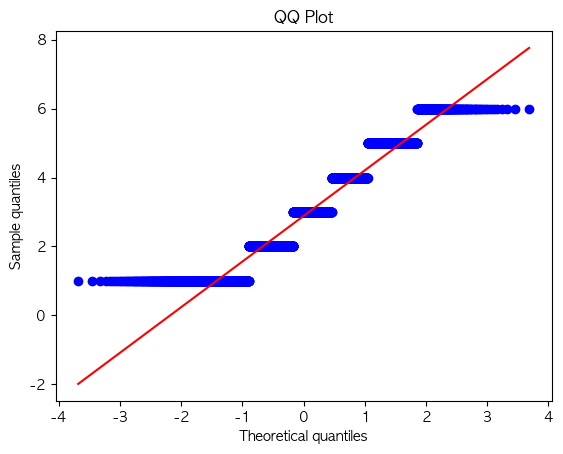

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 정규 분포를 따르는 랜덤한 데이터 생성
data = a['사회_등급'].values

# data_flattened = data.ravel()

# QQ plot 그리기
stats.probplot(data_flattened, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()


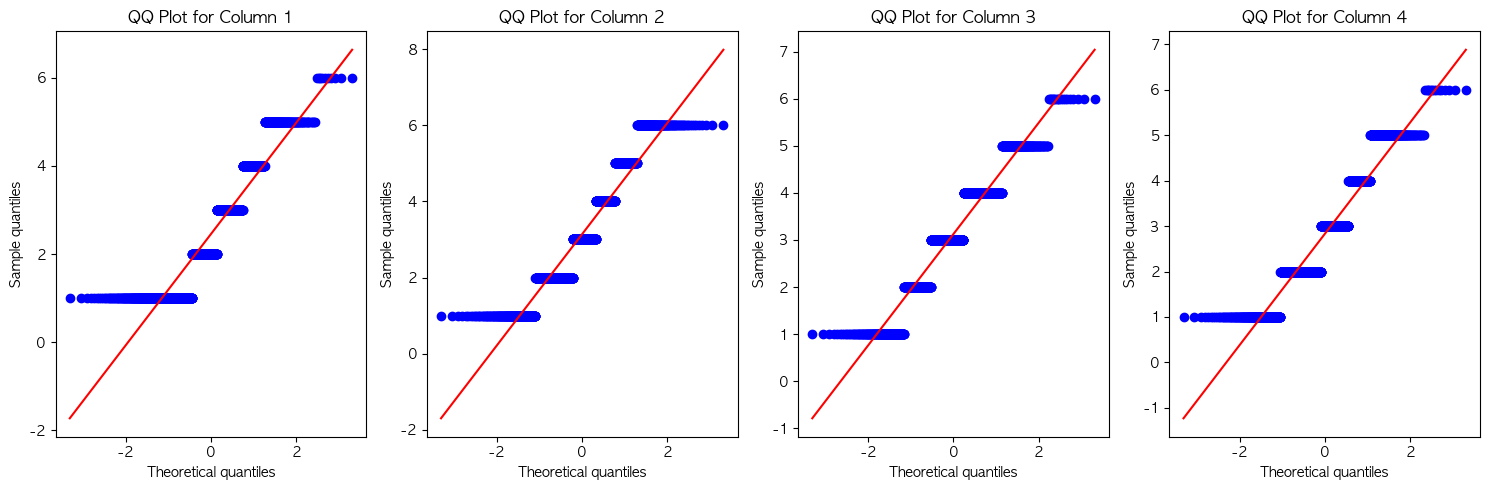

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 데이터 준비
data = a.values

# 각 열에 대한 QQ plot 그리기
num_cols = data.shape[1]
fig, axs = plt.subplots(1, num_cols, figsize=(15, 5))

for i in range(num_cols):
    stats.probplot(data[:, i], dist="norm", plot=axs[i])
    axs[i].set_title(f'QQ Plot for Column {i+1}')
    axs[i].set_xlabel('Theoretical quantiles')
    axs[i].set_ylabel('Sample quantiles')

plt.tight_layout()
plt.show()


In [26]:
esg2_grade

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급,사회_등급,지배구조_등급,통합_등급,t+1년도_환경등급,t+1년도_사회등급,t+1년도_지배구조등급,t+1년도_통합등급
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,2.074963,0.906745,2.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,2.634570,0.946606,3.0,4.0,4.0,4.0,3.0,5.0,3.0,4.0
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,2.998300,1.017722,3.0,5.0,3.0,4.0,5.0,6.0,4.0,5.0
3,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,0.357576,0.714733,1.0,3.0,4.0,3.0,1.0,3.0,4.0,3.0
4,BYC,섬유의복,A001460,12,2021,Annual,6.844345e+08,1.333390e+08,4923098,30955006,...,0.341307,0.811589,1.0,3.0,4.0,3.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,휴스틸,철강금속,A005010,12,2021,Annual,9.519209e+08,4.119306e+08,94258672,236068035,...,0.984204,1.893904,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0
1514,휴스틸,철강금속,A005010,12,2022,Annual,1.206374e+09,6.405798e+08,153866354,197585910,...,1.133904,3.468866,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0
1515,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-3.383781,0.284095,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
1516,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,0.793904,0.566119,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0


In [32]:
a = pd.read_csv('csv/재무비율/최종/등급/esg2기_등급.csv')
b = a[a['회계연도'] == 2021]

b['업종명'].value_counts()

업종명
화학             75
유통업            42
전기전자           41
철강금속           40
기타금융           37
운수장비           36
서비스업           36
의약품            32
기계             29
음식료품           26
섬유의복           21
건설업            18
운수창고업          17
종이목재           16
비금속광물          12
기타제조업          10
전기가스업           7
통신업             4
농업, 임업 및 어업     3
의료정밀            3
광업              1
Name: count, dtype: int64

In [34]:
b = pd.read_csv('csv/재무비율/최종/등급/환경_1기_등급.csv')
c = b[b['회계연도'] == 2015]

c['업종명'].value_counts()

업종명
화학             75
전기전자           42
유통업            42
철강금속           40
기타금융           37
운수장비           37
서비스업           36
의약품            33
기계             30
음식료품           26
섬유의복           21
운수창고업          17
건설업            17
종이목재           16
비금속광물          12
기타제조업          10
전기가스업           7
통신업             3
농업, 임업 및 어업     3
의료정밀            3
광업              1
Name: count, dtype: int64